# <span style = "color: green">Team member: Hong Thoai Nga Mia Tran & Yiyao Li

In [1]:
# ignoring these if not using google colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# ignoring these if not using google colab
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
import pandas as pd


### Loadding Tools and Packages
##Basics
import pandas as pd
import numpy as np
import sys, random
import math
try:
    import cPickle as pickle
except:
    import pickle
import string
import re
import os
import time
from tqdm import tqdm
from termcolor import colored, cprint


## ML and Stats 
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets, linear_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import export_graphviz


from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def RMSE(y_true,y_pred):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return sqrt(mean_squared_error(y_true,y_pred))    


## Visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import cm
%matplotlib inline
init_notebook_mode()
!pip install mglearn
import mglearn

from IPython.display import HTML
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import make_scorer
def RMSE(y_true,y_pred):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return sqrt(mean_squared_error(y_true,y_pred))    

from sklearn.model_selection import train_test_split

### model parts
# k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Linear model
from sklearn.linear_model import (LogisticRegression, Ridge, Lasso)
# Tree based method
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor)
from sklearn import tree
# Support vector machine
from sklearn.svm import SVC, LinearSVC, SVR
# neural network
from sklearn.neural_network import MLPClassifier, MLPRegressor



# <span style = "color: blue" >Installing & Loading important modules from github
    Need to add git to environment path if wanting to installing through git. Otherwise, you can do to github here to download directly. 

### <span style = "color: blue" >Github Link:    https://github.com/2miatran/GridSearchML

In [0]:
### this package is for data summary
!git clone https://github.com/2miatran/summary_statistics.git
!cp summary_statistics/summary_statistics.py ./  ## cp to your current directory

### this module is for model tuning using gridsearch
!git clone https://github.com/2miatran/GridSearchML.git
!cp GridSearchML/* ./  ## cp to your current directory


Cloning into 'summary_statistics'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12 (delta 4), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
## import modules for summarized statistics
from summary_statistics import suggesting_column_types, statistics_for_cat_data, statistics_for_cont_data

## import dictionary for model tuning  
from hyperparameter import classifier_model_hyperparameter, regressor_model_hyperparameter

## import modules for Girsearch, visualization
from GridSearchML import plot_feature_importances, plot_GridSearchResult, model_tuning, run_model_selection, tnse_visuallization, RMSE
from sklearn.metrics import make_scorer

# <span style = "color: GREEN" >1. DATA EXPLORATION PREPROCESSING

In [37]:
## load data and create needed columns
data = pd.read_csv('student-por.csv', sep=';')
data['G3_binary'] = (data['G3']>=10).astype(int)
data['G3_5cats'] = data['G3'].transform(lambda x: np.select(condlist = [x in range(16,21), x in range(14,16), x in range(12,14), x in range(10,12), x in range(0,10)], 
                                                           choicelist= [1, 2, 3, 4, 5]))
target_names_5 = ['16-20', '14-15', '12-13', '10-11', '<10']
print(data.shape)
data[:5]

(649, 35)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary,G3_5cats
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,1,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,1,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,1,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,1,3


## <span style = "color: green" >Basic Summary Statistics

In [7]:
### Runing helper functions to find suggested list of categorical & continuous variables. This is helpful for big table without looking at each column
cat_list, cont_list = suggesting_column_types(data, cutoff= 8) #cutoff value: if the number of unique values in a column below this cutoff, consider it categorical
print('Suggested %s columns for categorical data: \n%s' %(len(cat_list), cat_list))
print('Suggested %s columns for continuous data: \n%s' %(len(cont_list), cont_list))



Suggested 31 columns for categorical data: 
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_binary', 'G3_5cats']
Suggested 4 columns for continuous data: 
['absences', 'G1', 'G2', 'G3']


In [8]:
### modify categorical/continuous lists if needed, or you can redefine your cat_list, cont_list based on suggested columns 
cat_list = ['school', 'sex','address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cont_list = ['absences', 'age', 'G1', 'G2', 'G3']


### For continuous data: 
# - Choose statistitics to summarize (mean and/or min_max and/or median)
# - Choose col to stratify when summarizing. 
df_statitics_for_conts = statistics_for_cont_data(data, col='G3_binary', cont = cont_list, 
                                                  mean = True, min_max=False, median = True,
                                                  nonstyle=False, themecolor='green', caption_prefix='Data Summary') ##Some options for color/theme of output table
cprint('\nFOR CONTINUOUS DATA', 'grey', attrs=['bold'])
display(df_statitics_for_conts)

### For categorical data
# - Choose col to stratify when summarize. 
df_statitics_for_cats_by_label = statistics_for_cat_data(data, col='G3_binary', cats = cat_list, 
                                                themecolor = 'blue') ##Some options for color/theme of output table


cprint('\nFOR CATEGORICAL DATA', 'grey', attrs=['bold'])
display(df_statitics_for_cats_by_label)


FOR CONTINUOUS DATA



FOR CATEGORICAL DATA


## <span style = "color: green" >Data visualization

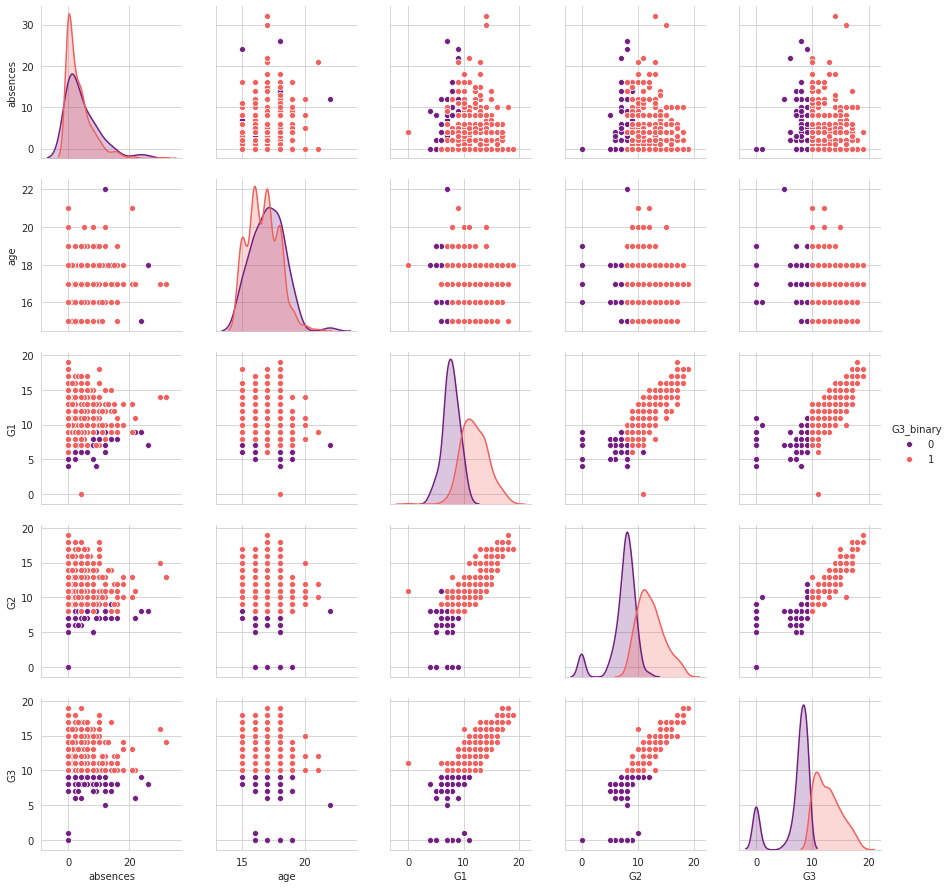

In [0]:
### plot data
data_for_Scatter_plot = data.copy(deep=True)
pairplot = sns.pairplot(data_for_Scatter_plot, vars=['absences', 'age', 'G1', 'G2', 'G3'], hue='G3_binary', palette="magma")
pairplot.savefig("pairplot.png")
#plt.title('EXPLORING CONTINUOUS DATA')
#plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



Text(0.5, 1.0, 'Histogram of data for G3 - stratified by')

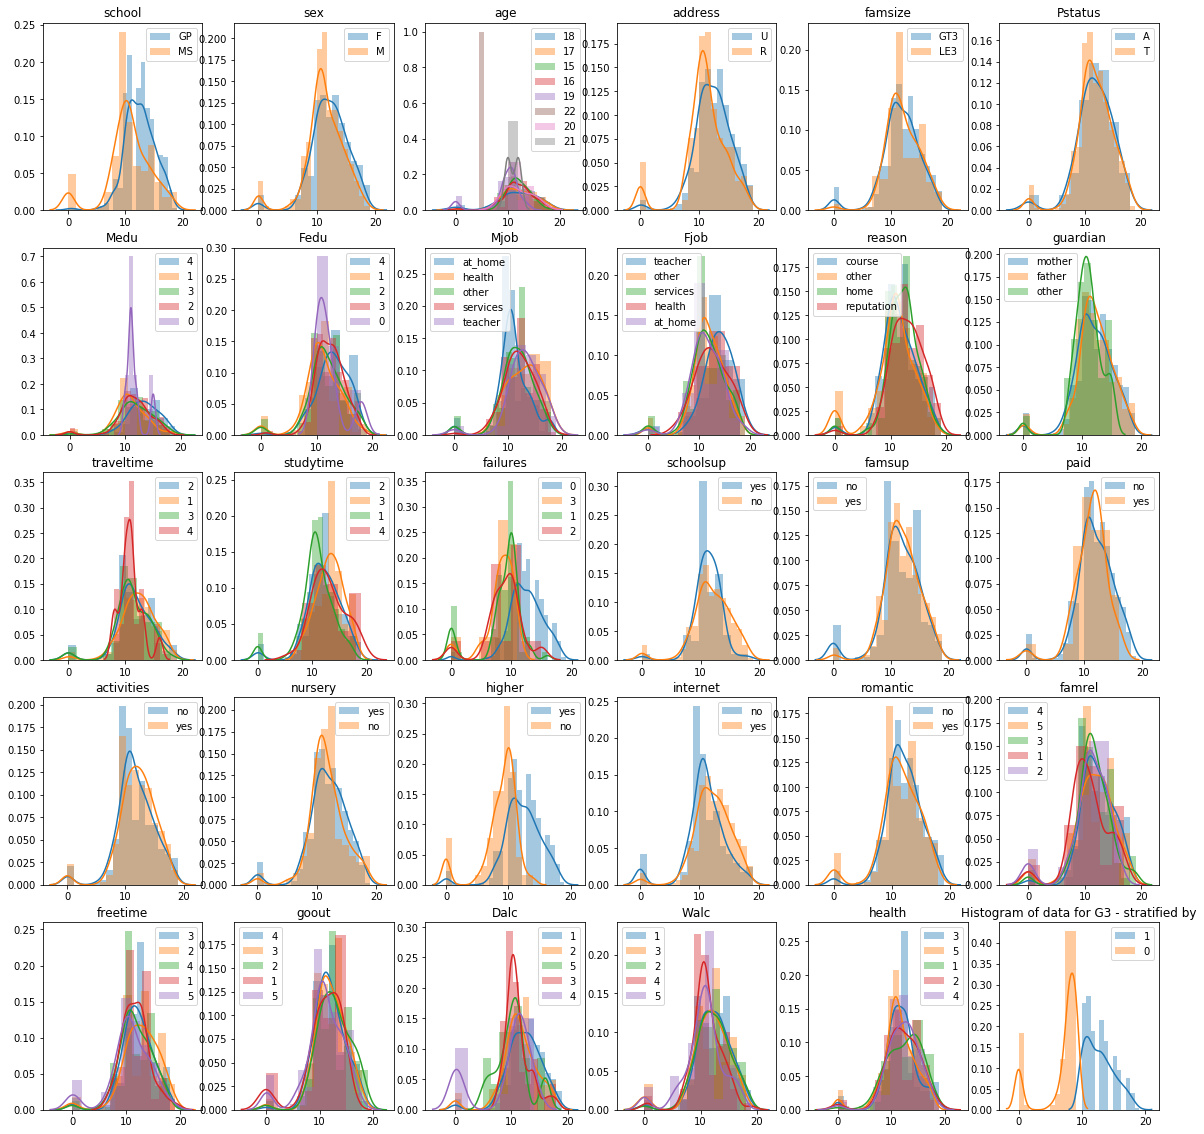

In [0]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))

#feature_to_draw =  [c for c in list(data.columns[:12]) if c not in ['G3_binary']] #target is not continuous, drop proline just because i want to fit to 12 (3x4)) for 12 features
feature_to_draw = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_binary']

for feature, ax in zip(feature_to_draw, axes.reshape(-1)):
    for t in data[feature].unique():
        sns.distplot(data[data[feature]==t]['G3'] , ax = ax, label=t)
    ax.legend()
    ax.set_title(feature)
    ax.set_xlabel('')
plt.title('Histogram of data for G3 - stratified by')        

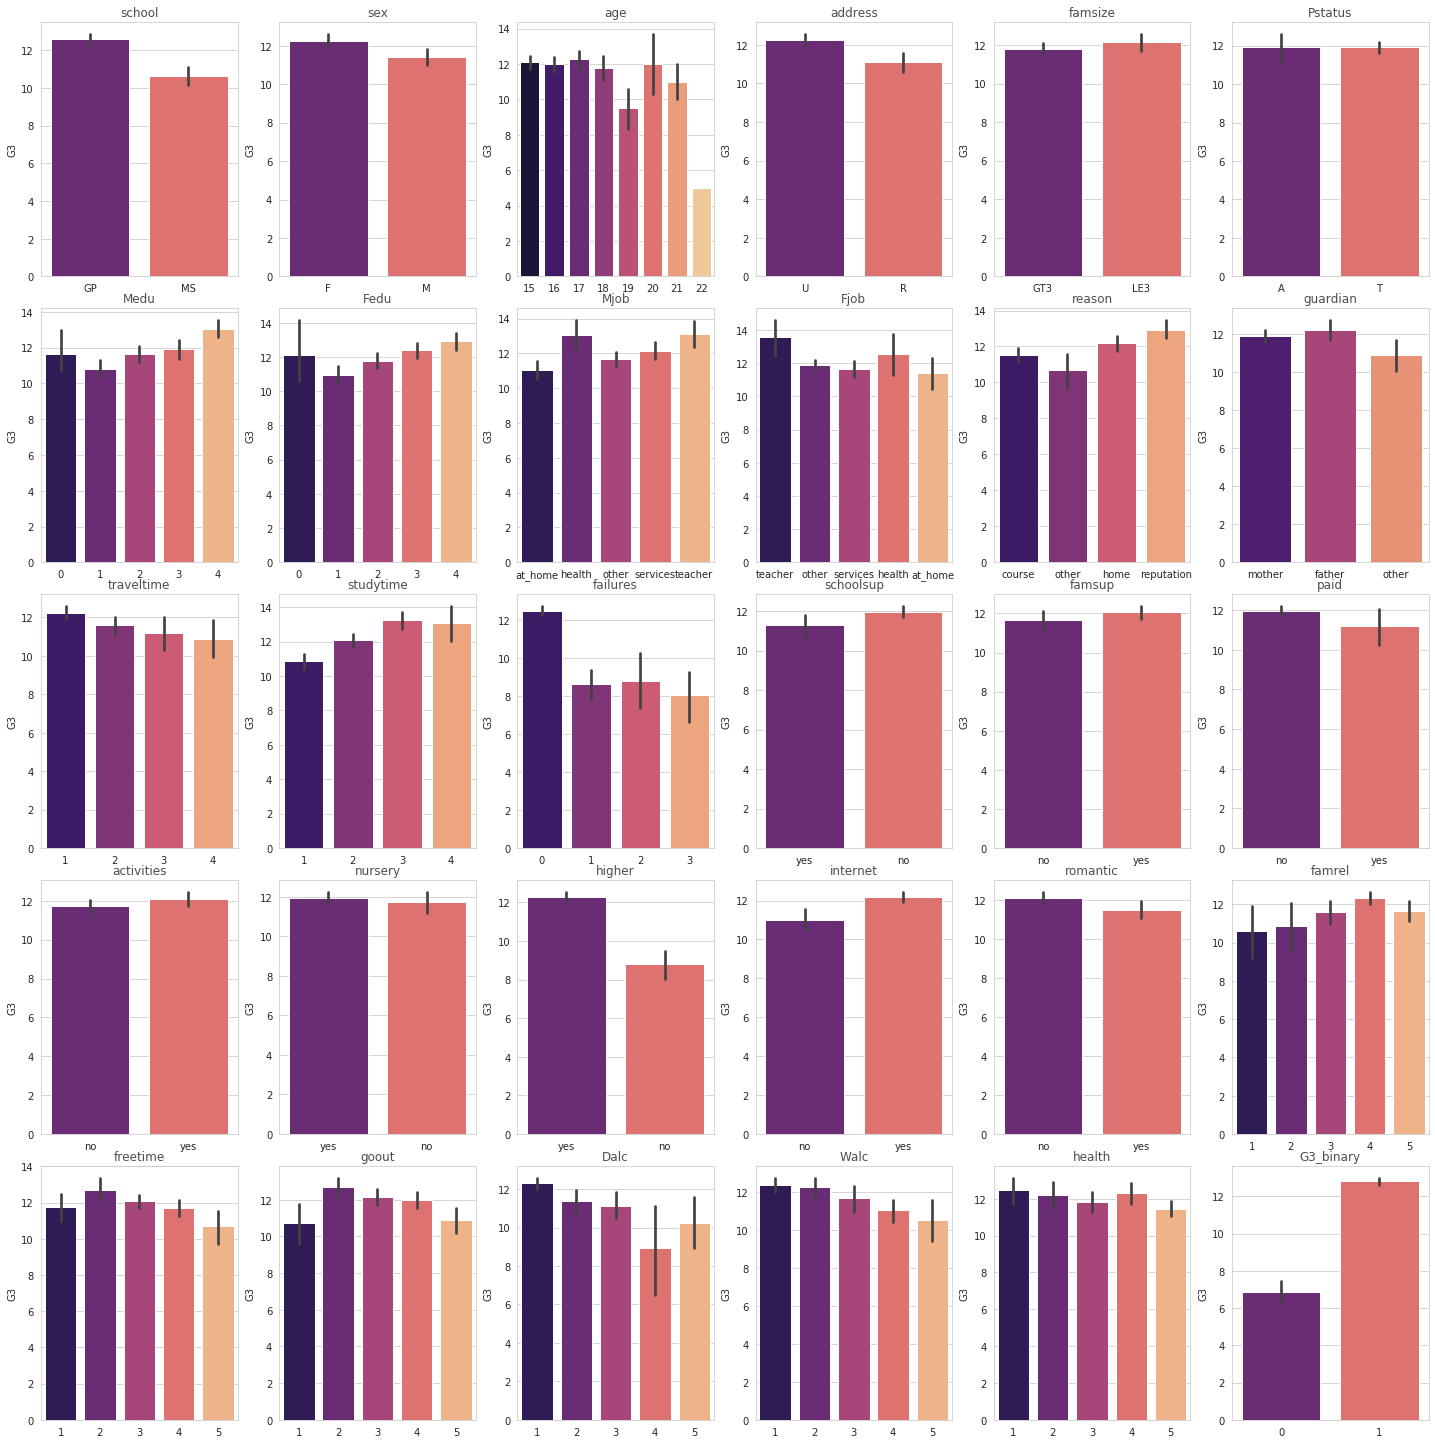

In [0]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
feature_to_draw = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_binary']
fig.tight_layout()
sns.set_style("whitegrid")

for feature, ax in zip(feature_to_draw, axes.reshape(-1)):
    sns.set_style("whitegrid")

    sns.barplot(data = data, x = feature , y = 'G3', ax = ax, palette = 'magma')
    ax.set_title(feature, color = '0.3')
    ax.set_xlabel('')
#plt.title('Histogram of data for G3 - stratified by')        

In [0]:
data.shape

(649, 36)

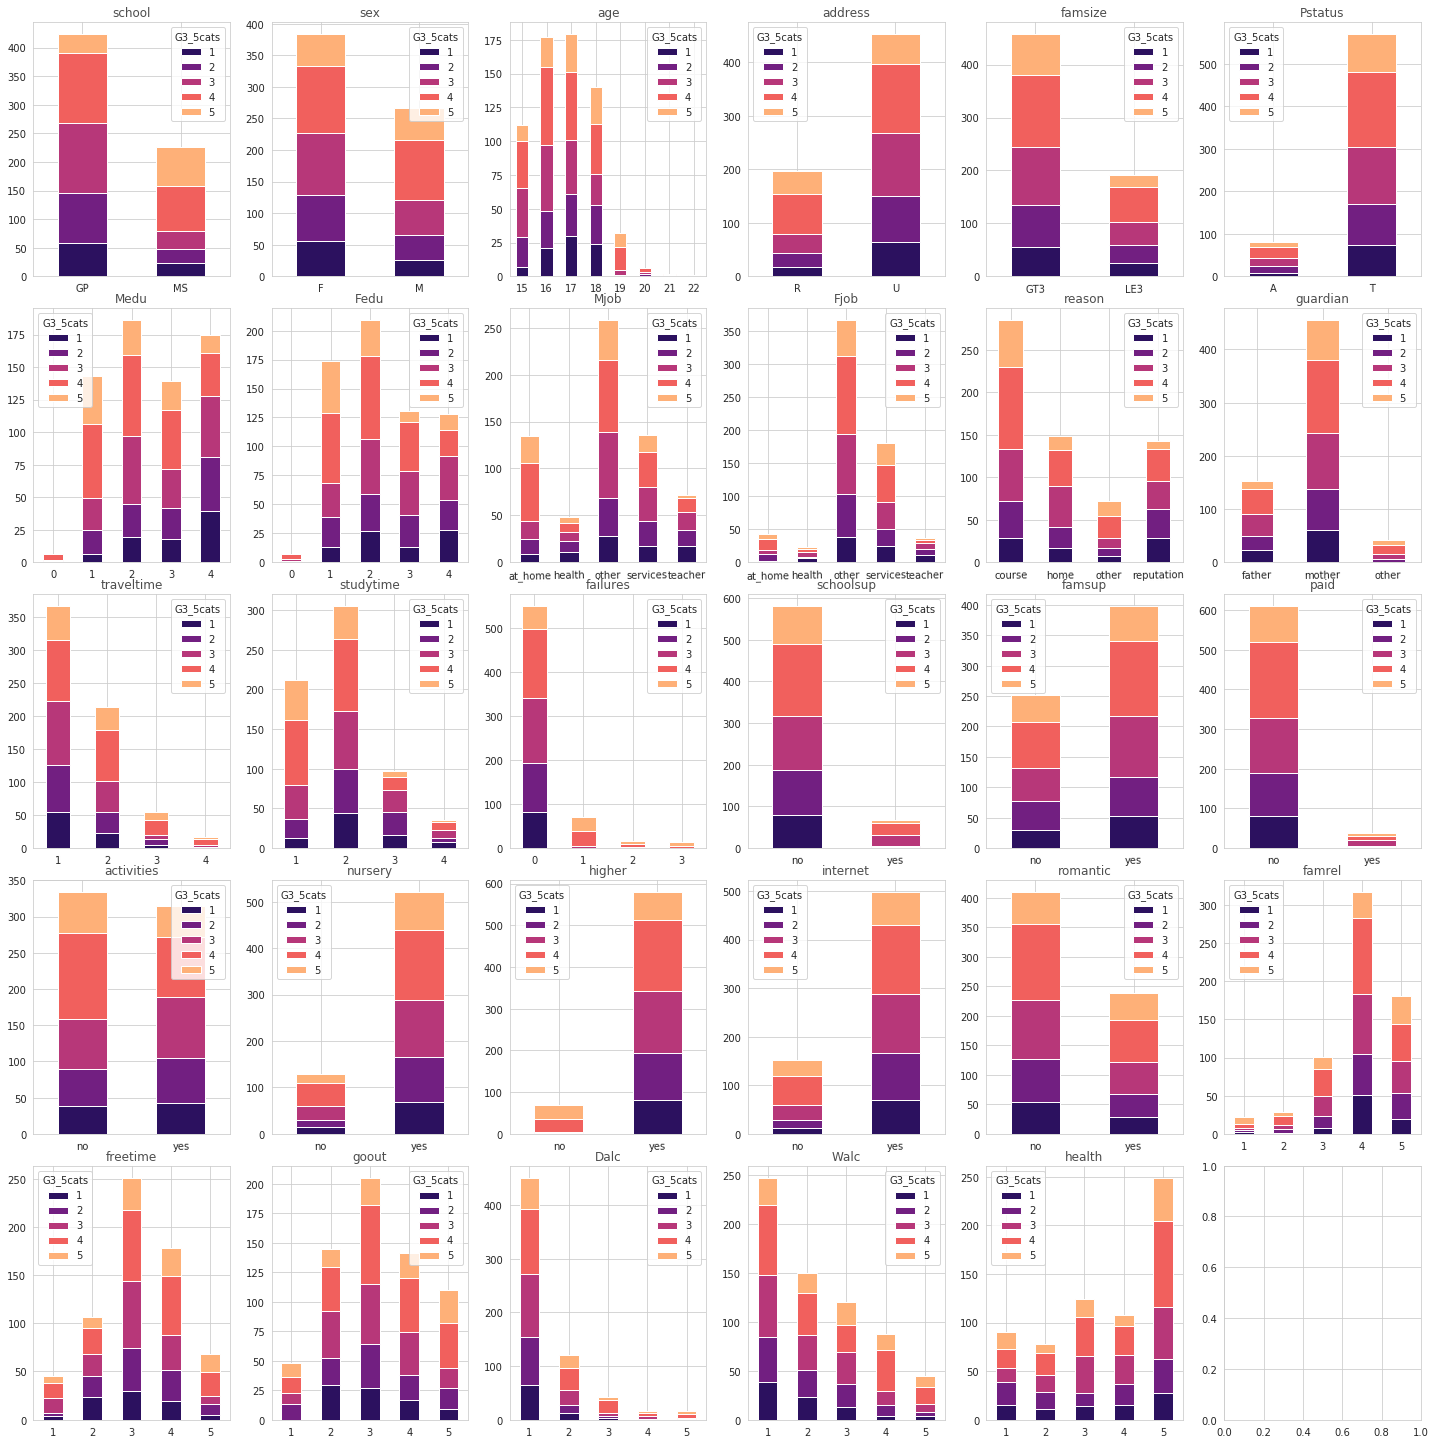

In [0]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
feature_to_draw = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
fig.tight_layout()
sns.set_style("whitegrid")

for feature, ax in zip(feature_to_draw, axes.reshape(-1)):
    sns.set_style("whitegrid")
    color=sns.color_palette(palette= 'magma', n_colors= 5)#len(data[feature].unique()))
    #df_plot = data.groupby([feature,'G3_binary']).size().reset_index().pivot(columns=feature, index='G3_binary', values=0)
    df_plot = data.groupby(['G3_5cats', feature]).size().reset_index().pivot(columns= 'G3_5cats', index=feature, values=0)
    df_plot.plot(kind='bar', stacked=True, ax = ax, color = color, rot = True)
    #break
    #sns.countplot(data = data, x = feature , hue = 'G3_binary', ax = ax, palette = 'magma')
    ax.set_title(feature, color = '0.3')
    ax.set_xlabel('')
#plt.title('Histogram of data for G3 - stratified by') 
fig.savefig('barplot_5cat.png')       

# <span style = "color: green" >**2. WORK WITH DATA WITH G1 AND G2 VARIABLES**

In [29]:
### BEFORE SPPLITTING, discretize everything, AS WE CREATED G3_5CATS AND G3_BINARY AS NUMERICAL TYPE, THEY WON'T BE AFFECTED.
data = pd.get_dummies(data)
data[:5]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary,G3_5cats,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,4,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,3,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,3,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


## <span style = "color: green" >Splitting the data

In [30]:
### Split the data to train and test set. We will only explore train set
trainval, holdout_test = train_test_split(data, test_size=0.2, random_state=0, stratify=data['G3_5cats'])

X_holdouttest, y_holdouttest_binary, y_holdouttest_5cats, y_holdouttest_reg = holdout_test.drop(columns=['G3', 'G3_binary', 'G3_5cats']), holdout_test['G3_binary'], holdout_test['G3_5cats'], holdout_test['G3'] 
X_trainval, y_trainval_binary, y_trainval_5cats, y_trainval_reg = trainval.drop(columns=['G3', 'G3_binary', 'G3_5cats']), trainval['G3_binary'], trainval['G3_5cats'], trainval['G3'] 

print(trainval.shape, holdout_test.shape)

trainval[:2]

(519, 61) (130, 61)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary,G3_5cats,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
579,18,1,3,1,1,0,4,3,3,2,3,3,0,9,10,9,0,5,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1
195,16,3,3,1,2,0,4,2,3,1,2,3,0,11,12,13,1,3,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1


## <span style = "color: green" >Using t-sne for data visuallization in 2D and 3D

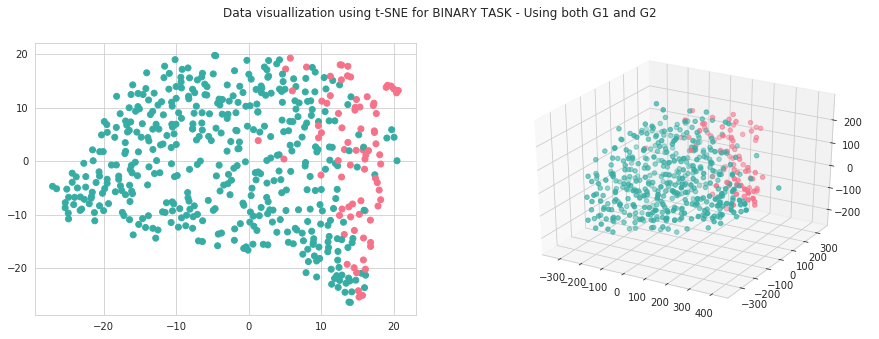

In [0]:
tnse_visuallization(df = trainval, stratified_by = 'G3_binary', #colored by label/class
                    column_to_drop = ['G3', 'G3_binary', 'G3_5cats'], #drop multiple columns before visuallization
                    title = 'Data visuallization using t-SNE for BINARY TASK - Using both G1 and G2') #add title if needed

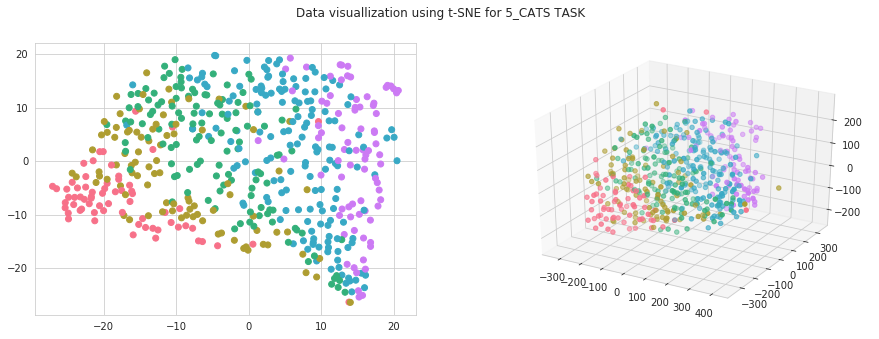

In [0]:
tnse_visuallization(df = trainval, stratified_by = 'G3_5cats', column_to_drop = ['G3', 'G3_binary', 'G3_5cats'], title = 'Data visuallization using t-SNE for 5_CATS TASK')

FOR THE ANALYSIS ON THE TRAINVAL, WE NEED FIRST TO SPLIT THE TRAINVAL. AS WE HAVE 2 TASKS (BINARY AND MULTICLASS CLASSIFICATION, WE SPLIT THE DATA ONCE, STRATIFIED ON G3_5CATS, NOTICED THAT G3_BINARY IS A SUBGROUP OF G3_5CATS, BY DOING THIS, WE HAVE EQUALLY DISTRIBUTED SCORE SUBGROUP IN TRAIN AND TEST SET)

## <span style = "color: green" >Exploring Model-based Feature Selection

X_train.shape: (415, 58)
X_train_l1.shape: (415, 29)
Test score before variable selections: 0.904
Test score after variable selections: 0.904


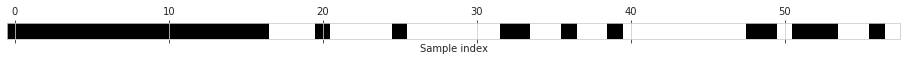

In [0]:
#### 
### look it up,variable selection using crossvariltion?? drig search???
### split the data first
train, test = train_test_split(trainval, test_size=0.2, random_state=0, stratify=trainval['G3_5cats'])
X_train, y_train_binary, y_train_5cats = train.drop(columns=['G3', 'G3_binary', 'G3_5cats']), train['G3_binary'], train['G3_5cats']
X_test, y_test_binary, y_test_5cats = test.drop(columns=['G3', 'G3_binary', 'G3_5cats']), test['G3_binary'], test['G3_5cats']

selectionmodel = RandomForestClassifier(n_estimators=100, random_state=42)
trainmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
run_model_selection(X_train, y_train_binary, X_test, y_test_binary, selectionmodel, trainmodel ,threshold = "median")

## <span style = "color: green" >GridSearch For Binary Classification

In [31]:
bestgridsearch_acc, gridsearchresult_acc, summary_table_acc, model_list_acc, pred_values_acc = model_tuning(classifier_model_hyperparameter, X_trainval, y_trainval_binary, X_holdouttest, y_holdouttest_binary,
                                                         cv = 5, scoring = 'accuracy', scoring_name = 'acc', print_confuse=True)
cprint('Results on data with G1 & G2 - BINARY CLASSIFICATION TASK', color='blue')
summary_table_acc

==================== Train and evaluate on K-Nearest Neighbors ====================
[[ 12   8]
 [  0 110]]
==================== Train and evaluate on Logistic Regression ====================
[[16  4]
 [16 94]]
==================== Train and evaluate on Linear SVM ====================
[[17  3]
 [14 96]]
==================== Train and evaluate on Gradient Boosting Classifier ====================
[[ 11   9]
 [  1 109]]
==================== Train and evaluate on Decision Tree ====================
[[ 12   8]
 [  5 105]]
==================== Train and evaluate on Random Forest ====================
[[ 11   9]
 [  8 102]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[18  2]
 [13 97]]
Results on data with G1 & G2 - BINARY CLASSIFICATION TASK


,Model,Best Parameters,Train acc,Test acc
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 5}",0.936416,0.938462
0,Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.963391,0.846154
0,Linear SVM,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear', '...",0.965318,0.869231
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.971098,0.923077
0,Decision Tree,"{'max_depth': 5, 'random_state': 117}",0.973025,0.900000
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.996146,0.869231
0,MLP,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",1.000000,0.884615


In [32]:
bestgridsearch, gridsearchresult, summary_table, model_list, pred_values = model_tuning(classifier_model_hyperparameter, 
                                                                                        X_trainval, y_trainval_binary, 
                                                                                        X_holdouttest, y_holdouttest_binary,
                                                                                        cv = 5, 
                                                                                        scoring = 'roc_auc', scoring_name = 'auc', 
                                                                                        print_confuse=True)
cprint('Results on data with G1 & G2 - BINARY CLASSIFICATION TASK', color='blue')
summary_table

==================== Train and evaluate on K-Nearest Neighbors ====================
[[ 11   9]
 [  0 110]]
==================== Train and evaluate on Logistic Regression ====================
[[ 17   3]
 [  8 102]]
==================== Train and evaluate on Linear SVM ====================
[[17  3]
 [14 96]]
==================== Train and evaluate on Gradient Boosting Classifier ====================
[[ 11   9]
 [  1 109]]
==================== Train and evaluate on Decision Tree ====================
[[ 12   8]
 [  1 109]]
==================== Train and evaluate on Random Forest ====================
[[ 11   9]
 [  8 102]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[17  3]
 [13 97]]
Results on data with G1 & G2 - BINARY CLASSIFICATION TASK


,Model,Best Parameters,Train auc,Test auc
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.972651,0.979773
0,Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.978559,0.958182
0,Linear SVM,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear', '...",0.980923,0.946818
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.993423,0.956136
0,Decision Tree,"{'max_depth': 3, 'random_state': 117}",0.968423,0.932955
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.999886,0.885682
0,MLP,"{'activation': 'relu', 'alpha': 0.3, 'hidden_l...",1.000000,0.930000


### <span style = "color: grey" >Best model from Gridsearch

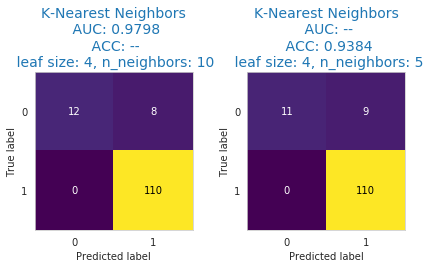

In [35]:
### choosing the best model, which is Logistic Regression to do some visualization for the results
accs = ['--', 0.9384]
aucs = [0.9798, '--']
fig, axs = plt.subplots(1, 2)#, sharey= False)
titles = ['\n leaf size: 4, n_neighbors: 10', '\n leaf size: 4, n_neighbors: 5']
fig.tight_layout()
for model, ax, auc, acc, title, pred_ in zip(['K-Nearest Neighbors', 'K-Nearest Neighbors'], axs, aucs, accs, titles, [pred_values_acc, pred_values]):
    
    pred = pred_[model]
    #Confusion matrix for classification task
    scores_image = mglearn.tools.heatmap(confusion_matrix(y_holdouttest_binary, pred), xlabel='Predicted label',
                                        ylabel='True label', xticklabels=[0,1],
                                        yticklabels=[0,1], fmt="%d", ax=ax, cmap='viridis')#plt.cm.gray_r) 
    ax.set_title(model + "\n AUC: "+str(auc) + "\n ACC: "+ str(acc) +title, c='C0', fontsize = 14)
axs[0].invert_yaxis()
axs[1].invert_yaxis()
plt.tight_layout()    

### <span style = "color: grey" >Feature importances

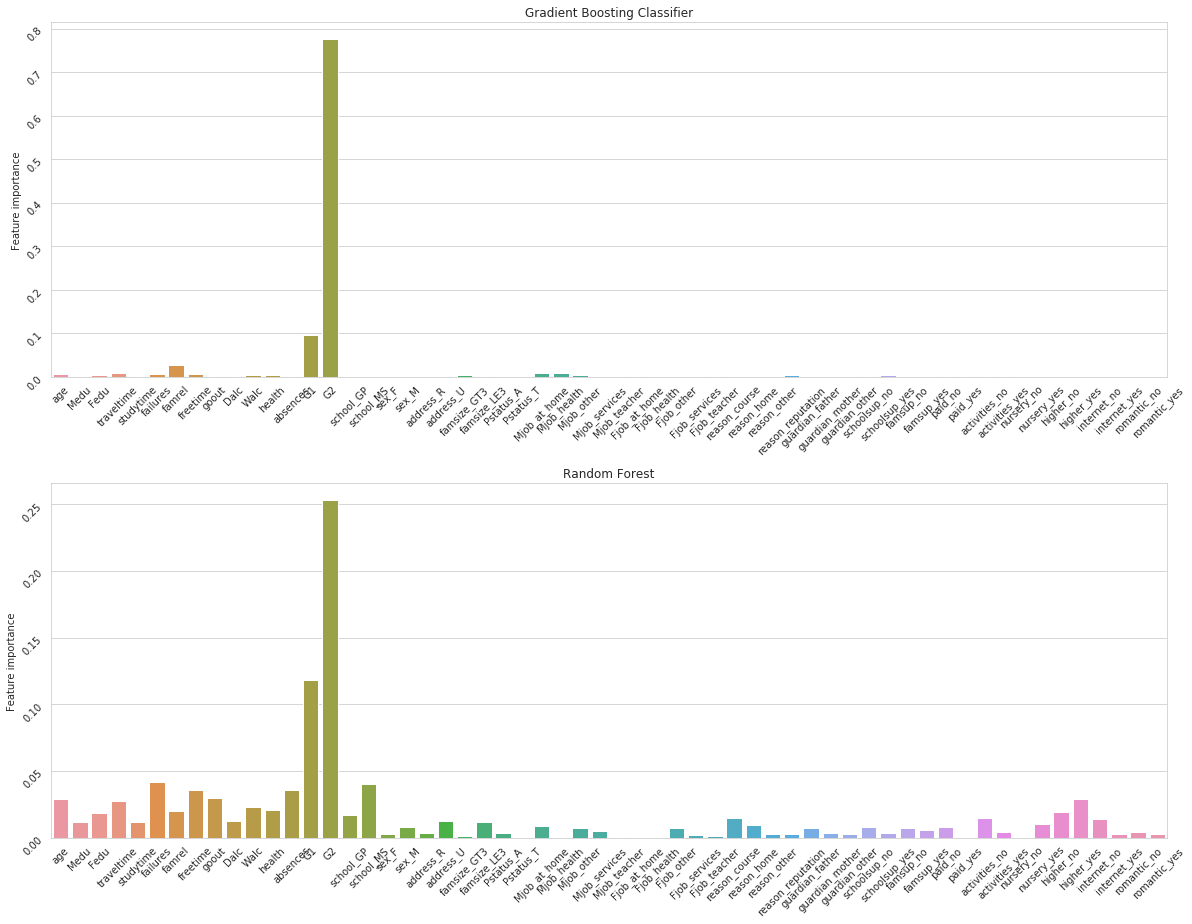

In [33]:
fig, axes = plt.subplots(len(model_list_acc), 1, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)
sns.set_style("whitegrid")
for (model, coef), ax in zip(model_list_acc.items(),axes):    
    plot_feature_importances(model, coef, X_trainval.columns,ax = ax)
    #ax.invert_yaxis()


## <span style = "color: green" >GridSearch For Multiclass Classification

In [36]:
bestgridsearch_5, gridsearchresult_5, summary_table_5, model_list_5, pred_values_5= model_tuning(classifier_model_hyperparameter, X_trainval, y_trainval_5cats, X_holdouttest, y_holdouttest_5cats,
                                                         cv = 5, scoring = 'accuracy', scoring_name = 'accuracy', print_confuse = True)
summary_table

==================== Train and evaluate on K-Nearest Neighbors ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_

[[11  5  0  0  0]
 [ 4 12  6  1  0]
 [ 0  7 20  4  0]
 [ 0  0  5 35  0]
 [ 0  0  0 10 10]]
==================== Train and evaluate on Logistic Regression ====================


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option t

[[11  3  2  0  0]
 [ 2  8  9  4  0]
 [ 0  3 13 15  0]
 [ 0  0  2 27 11]
 [ 0  0  0  6 14]]
==================== Train and evaluate on Linear SVM ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[10  6  0  0  0]
 [ 3 11  9  0  0]
 [ 2  2 19  8  0]
 [ 0  0  1 26 13]
 [ 0  0  0  5 15]]
==================== Train and evaluate on Gradient Boosting Classifier ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[14  2  0  0  0]
 [ 5 12  6  0  0]
 [ 0  2 25  4  0]
 [ 0  0  0 39  1]
 [ 0  0  0  8 12]]
==================== Train and evaluate on Decision Tree ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[12  4  0  0  0]
 [ 0 16  7  0  0]
 [ 0  1 26  4  0]
 [ 0  0  0 39  1]
 [ 0  0  0 10 10]]
==================== Train and evaluate on Random Forest ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[13  3  0  0  0]
 [ 4 12  7  0  0]
 [ 2 12 12  5  0]
 [ 0  0  2 35  3]
 [ 0  0  1  9 10]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[ 9  5  2  0  0]
 [ 1 10 11  1  0]
 [ 0  4 14 13  0]
 [ 0  0  1 28 11]
 [ 0  0  0  3 17]]


,Model,Best Parameters,Train auc,Test auc
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.972651,0.979773
0,Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.978559,0.958182
0,Linear SVM,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear', '...",0.980923,0.946818
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.993423,0.956136
0,Decision Tree,"{'max_depth': 3, 'random_state': 117}",0.968423,0.932955
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.999886,0.885682
0,MLP,"{'activation': 'relu', 'alpha': 0.3, 'hidden_l...",1.000000,0.930000


In [12]:
cprint('Results on data with G1 & G2 - MULTICLASS CLASSIFICATION TASK', color='blue')
summary_table_5

Results on data with G1 & G2 - MULTICLASS CLASSIFICATION TASK


,Model,Best Parameters,Train accuracy,Test accuracy
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.734104,0.676923
0,Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.718690,0.561538
0,Linear SVM,"{'C': 1000, 'gamma': 0.1, 'kernel': 'linear', ...",0.882466,0.623077
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.851638,0.784615
0,Decision Tree,"{'max_depth': 3, 'random_state': 117}",0.761079,0.792308
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.980732,0.630769
0,MLP,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.921002,0.600000


### <span style = "color: grey" >Best model from Gridsearch

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

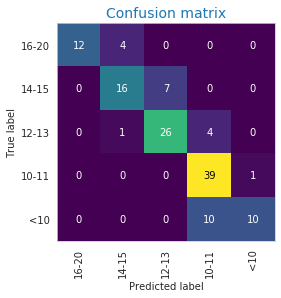

In [39]:
### choosing the best model, which is Decision tree to do some visualization for the results
pred = bestgridsearch_5['Decision Tree'].predict(X_holdouttest)

###Confusion matrix 
scores_image = mglearn.tools.heatmap(confusion_matrix(y_holdouttest_5cats, pred), xlabel='Predicted label',
                                     ylabel='True label', xticklabels=target_names_5,
                                     yticklabels=target_names_5, cmap="viridis", fmt="%d")
plt.title("Confusion matrix", c='C0', fontsize = 14)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)

In [45]:
print(classification_report(y_holdouttest_5cats, pred, target_names=target_names_5))

              precision    recall  f1-score   support

       16-20       1.00      0.75      0.86        16
       14-15       0.76      0.70      0.73        23
       12-13       0.79      0.84      0.81        31
       10-11       0.74      0.97      0.84        40
         <10       0.91      0.50      0.65        20

    accuracy                           0.79       130
   macro avg       0.84      0.75      0.78       130
weighted avg       0.81      0.79      0.79       130



### <span style = "color: grey" >Feature importances

In [ ]:
fig, axes = plt.subplots(len(model_list_5), 1, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)
sns.set_style("whitegrid")
for (model, coef), ax in zip(model_list_5.items(),axes):    
    plot_feature_importances(model, coef, X_trainval.columns,ax = ax)
    #ax.invert_yaxis()


## <span style = "color: green" >GridSearch For Regression

In [0]:
bestgridsearch, gridsearchresult, summary_table, model_list, pred_values = model_tuning(regressor_model_hyperparameter, 
                                                         X_trainval, y_trainval_reg, X_holdouttest, y_holdouttest_reg,
                                                         cv = 5, 
                                                         scoring = {'R2': 'r2', 'RMSE': make_scorer(RMSE, greater_is_better=False)}, 
                                                         refit = 'RMSE',
                                                         scoring_name = 'RMSE')

### some midification to the output as gridsearch return negative MSE, toget the RMSE
summary_table['Train RMSE'] = summary_table['Train RMSE'].transform(lambda x: -x)
summary_table['Test RMSE'] = summary_table['Test RMSE'].transform(lambda x: -x)
summary_table


==================== Train and evaluate on K-Nearest Neighbors ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Ridge Regression ====================
==================== Train and evaluate on Lasso Regression ====================
==================== Train and evaluate on Linear SVR ====================
==================== Train and evaluate on Gradient Boosting Regressor ====================
==================== Train and evaluate on Decision Tree ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Random Forest ====================
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

,Model,Best Parameters,Train RMSE,Test RMSE
0,K-Nearest Neighbors,"{'leaf_size': 10, 'n_neighbors': 5}",1.168600,1.486245
0,Ridge Regression,{'alpha': 100},1.204976,1.315661
0,Lasso Regression,{'alpha': 0.1},1.246514,1.293575
0,Linear SVR,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",1.201688,1.341482
0,Gradient Boosting Regressor,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",1.180540,1.323670
0,Decision Tree,"{'max_depth': 3, 'random_state': 711}",1.292906,1.446966
0,Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.889907,1.265598
0,MLP,"{'alpha': 0.3, 'hidden_layer_sizes': [2], 'ran...",1.188597,1.480886


In [0]:
cprint('Results on data with G1 & G2 - REGRESSION CLASSIFICATION TASK', color='blue')
summary_table

Results on data with G1 & G2 - REGRESSION CLASSIFICATION TASK


,Model,Best Parameters,Train RMSE,Test RMSE
0,K-Nearest Neighbors,"{'leaf_size': 10, 'n_neighbors': 5}",1.168600,1.486245
0,Ridge Regression,{'alpha': 100},1.204976,1.315661
0,Lasso Regression,{'alpha': 0.1},1.246514,1.293575
0,Linear SVR,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",1.201688,1.341482
0,Gradient Boosting Regressor,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",1.180540,1.323670
0,Decision Tree,"{'max_depth': 3, 'random_state': 711}",1.292906,1.446966
0,Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.889907,1.265598
0,MLP,"{'alpha': 0.3, 'hidden_layer_sizes': [2], 'ran...",1.188597,1.480886


In [0]:
### VISUALIZATION THE GRIDSEARCH
results = gridsearchresult['Random Forest']
results = pd.DataFrame.from_dict(results)
for col in results:
    if 'RMSE' in col:
        results[col] = results[col].transform(lambda x: (-x))

scoring = {'R2': 'r2', 'RMSE': make_scorer(RMSE, greater_is_better=False)}
lims = {'R2': [(0,200), (0.5, 1)] , 'RMSE':  [(0,220), (0.25, 2.5)]}
param_of_interest = ['n_estimators', 'max_depth']

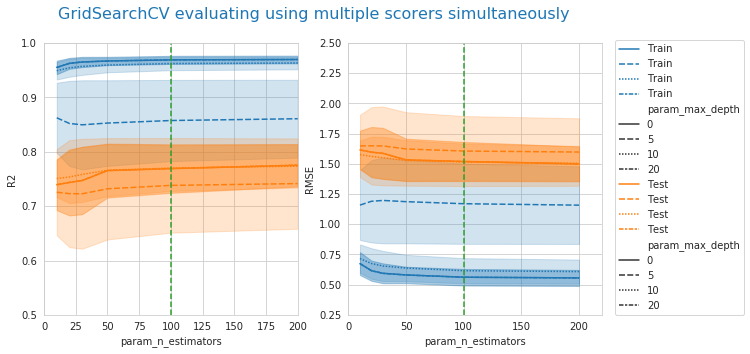

In [0]:
plot_GridSearchResult(results, scoring, param_of_interest, lims, figsize = (10,5))

# <span style = "color: green" >**3. WORK WITH DATA WITHOUT G1 & G2 VARIABLES**


In [15]:
### BEFORE SPPLITTING, discretize everything, AS WE CREATED G3_5CATS AND G3_BINARY AS NUMERICAL TYPE, THEY WON'T BE AFFECTED.
data = data.drop(columns = ['G1', 'G2'])
data = pd.get_dummies(data)
data[:5]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G3_binary,G3_5cats,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11,1,4,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11,1,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,1,3,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,1,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13,1,3,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


## <span style = "color: green" >Splitting the data

In [16]:
### Split the data to train and test set. We will only explore train set
trainval, holdout_test = train_test_split(data, test_size=0.2, random_state=0, stratify=data['G3_5cats'])

X_holdouttest, y_holdouttest_binary, y_holdouttest_5cats, y_holdouttest_reg = holdout_test.drop(columns=['G3', 'G3_binary', 'G3_5cats']), holdout_test['G3_binary'], holdout_test['G3_5cats'], holdout_test['G3'] 
X_trainval, y_trainval_binary, y_trainval_5cats, y_trainval_reg = trainval.drop(columns=['G3', 'G3_binary', 'G3_5cats']), trainval['G3_binary'], trainval['G3_5cats'], trainval['G3'] 

print(trainval.shape, holdout_test.shape)

trainval[:2]

(519, 59) (130, 59)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,G3_binary,G3_5cats,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
579,18,1,3,1,1,0,4,3,3,2,3,3,0,9,0,5,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1
195,16,3,3,1,2,0,4,2,3,1,2,3,0,13,1,3,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1


## <span style = "color: green" >Using t-sne to explore the possibility of data separation

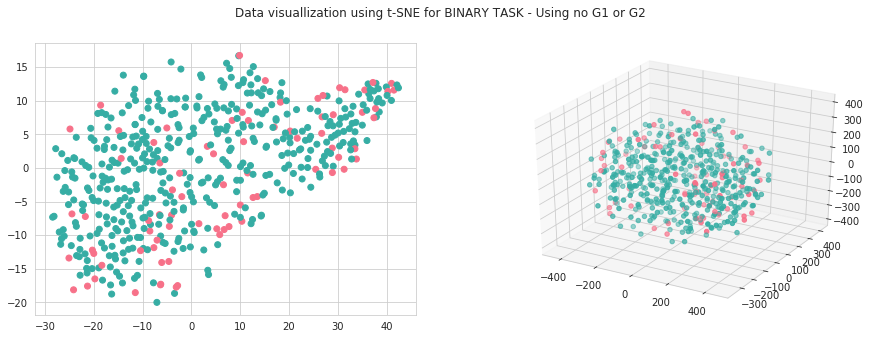

In [0]:
tnse_visuallization(df = trainval, stratified_by = 'G3_binary', column_to_drop = ['G3', 'G3_binary', 'G3_5cats'], title = 'Data visuallization using t-SNE for BINARY TASK - Using no G1 or G2')

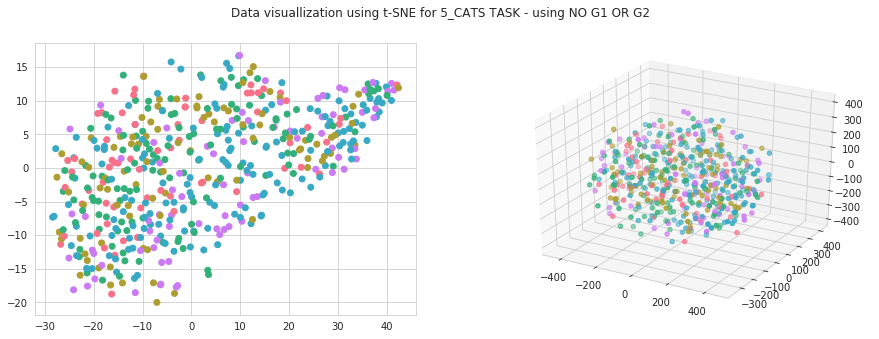

In [0]:
tnse_visuallization(df = trainval, stratified_by = 'G3_5cats', column_to_drop = ['G3', 'G3_binary', 'G3_5cats'], title = 'Data visuallization using t-SNE for 5_CATS TASK - using NO G1 OR G2')

## <span style = "color: green" >Exploring Model-based Feature Selection

X_train.shape: (415, 56)
X_train_l1.shape: (415, 28)
Test score before variable selections: 0.875
Test score after variable selections: 0.894


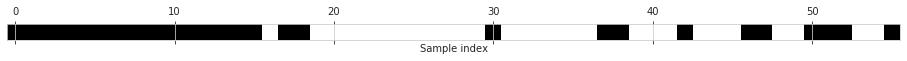

In [0]:
### look it up,variable selection using crossvariltion?? drig search???
### split the data first
train, test = train_test_split(trainval, test_size=0.2, random_state=0, stratify=trainval['G3_5cats'])
X_train, y_train_binary, y_train_5cats = train.drop(columns=['G3', 'G3_binary', 'G3_5cats']), train['G3_binary'], train['G3_5cats']
X_test, y_test_binary, y_test_5cats = test.drop(columns=['G3', 'G3_binary', 'G3_5cats']), test['G3_binary'], test['G3_5cats']

selectionmodel = RandomForestClassifier(n_estimators=100, random_state=117)
trainmodel = LogisticRegression(solver='lbfgs', max_iter=500)
run_model_selection(X_train, y_train_binary, X_test, y_test_binary, selectionmodel, trainmodel ,threshold = "median")

## <span style = "color: green" >GridSearch For Binary Classification
    Two scoring metric was used: Accuracy and AUC

In [17]:
bestgridsearch_acc, gridsearchresult_acc, summary_table_acc, model_list_acc, pred_values_acc = model_tuning(classifier_model_hyperparameter, X_trainval, y_trainval_binary, X_holdouttest, y_holdouttest_binary,
                                                         cv = 5, scoring = 'accuracy', scoring_name = 'acc', print_confuse=True)
cprint('Results on data without G1 & G2 - BINARY CLASSIFICATION TASK', color='blue')
summary_table_acc

==================== Train and evaluate on K-Nearest Neighbors ====================
[[  2  18]
 [  2 108]]
==================== Train and evaluate on Logistic Regression ====================
[[  7  13]
 [  8 102]]
==================== Train and evaluate on Linear SVM ====================
[[  6  14]
 [  7 103]]
==================== Train and evaluate on Gradient Boosting Classifier ====================
[[  8  12]
 [  4 106]]
==================== Train and evaluate on Decision Tree ====================
[[10 10]
 [15 95]]
==================== Train and evaluate on Random Forest ====================
[[  7  13]
 [  3 107]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[ 8 12]
 [16 94]]
Results on data without G1 & G2 - BINARY CLASSIFICATION TASK


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,Model,Best Parameters,Train acc,Test acc
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.859345,0.846154
0,Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.882466,0.838462
0,Linear SVM,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'ra...",0.884393,0.838462
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.926782,0.876923
0,Decision Tree,"{'max_depth': 3, 'random_state': 117}",0.872832,0.807692
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.990366,0.876923
0,MLP,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.998073,0.784615


In [18]:
bestgridsearch, gridsearchresult, summary_table, model_list, pred_values = model_tuning(classifier_model_hyperparameter, X_trainval, y_trainval_binary, X_holdouttest, y_holdouttest_binary,
                                                         cv = 5, scoring = 'roc_auc', scoring_name = 'auc', print_confuse=True)
cprint('Results on data without G1 & G2 - BINARY CLASSIFICATION TASK', color='blue')
summary_table

==================== Train and evaluate on K-Nearest Neighbors ====================
[[  1  19]
 [  2 108]]
==================== Train and evaluate on Logistic Regression ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[  7  13]
 [  8 102]]
==================== Train and evaluate on Linear SVM ====================
[[  1  19]
 [  0 110]]
==================== Train and evaluate on Gradient Boosting Classifier ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[  8  12]
 [  4 106]]
==================== Train and evaluate on Decision Tree ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[10 10]
 [12 98]]
==================== Train and evaluate on Random Forest ====================
[[  7  13]
 [  3 107]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[ 9 11]
 [14 96]]
Results on data without G1 & G2 - BINARY CLASSIFICATION TASK


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



,Model,Best Parameters,Train auc,Test auc
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 5}",0.914778,0.712273
0,Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.873690,0.834545
0,Linear SVM,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'rando...",0.995814,0.825909
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.939166,0.808636
0,Decision Tree,"{'max_depth': 4, 'random_state': 117}",0.887970,0.809318
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.999245,0.719545
0,MLP,"{'activation': 'relu', 'alpha': 0.3, 'hidden_l...",0.999801,0.833182


### <span style = "color: grey" >Best model from Gridsearch

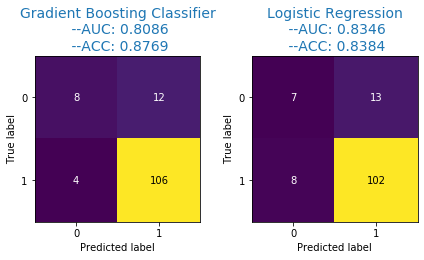

In [0]:
### choosing the best model, which is Logistic Regression to do some visualization for the results
import matplotlib.pyplot as plt

aucs = [0.8086, 0.8346]
accs = [0.8769, 0.8384]
fig, axs = plt.subplots(1, 2)#, sharey= False)

fig.tight_layout()
for model, ax, auc, acc in zip(['Gradient Boosting Classifier', 'Logistic Regression'], axs, aucs, accs):
    
    pred = pred_values[model]
    #Confusion matrix for classification task
    scores_image = mglearn.tools.heatmap(confusion_matrix(y_holdouttest_binary, pred), xlabel='Predicted label',
                                        ylabel='True label', xticklabels=[0,1],
                                        yticklabels=[0,1], fmt="%d", ax=ax) #cmap=plt.cm.gray_r, 
    ax.set_title(model + "\n --AUC: "+str(auc) + "\n --ACC: "+ str(acc), c='C0', fontsize = 14)
axs[0].invert_yaxis()
axs[1].invert_yaxis()
plt.tight_layout()    

### <span style = "color: grey" >Feature importances

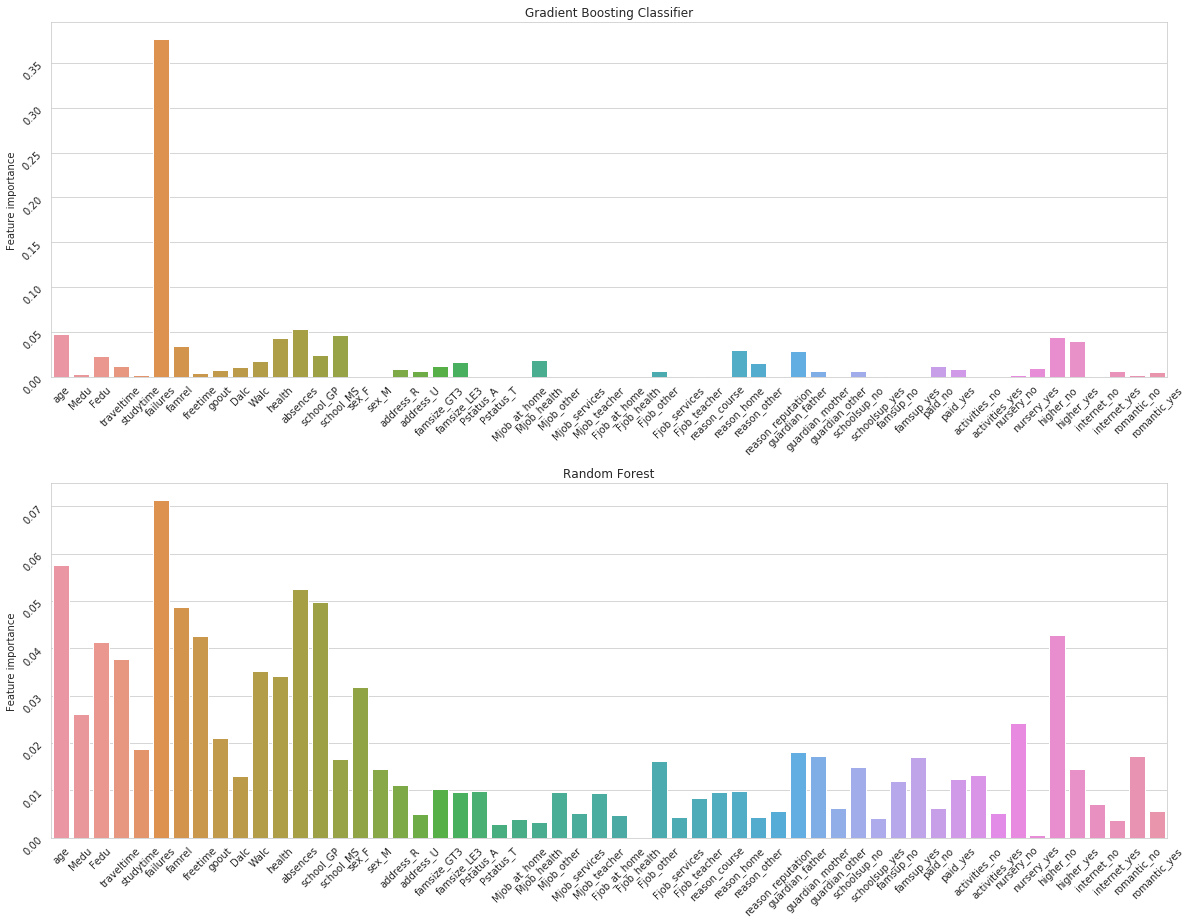

In [21]:
fig, axes = plt.subplots(len(model_list), 1, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)
sns.set_style("whitegrid")

for (model, coef), ax in zip(model_list.items(),axes):    
    plot_feature_importances(model, coef, X_trainval.columns,ax = ax)

## <span style = "color: green" >GridSearch For Multiclass Classification

In [22]:
bestgridsearch_5, gridsearchresult_5, summary_table_5, model_list_5, pred_values_5= model_tuning(classifier_model_hyperparameter, X_trainval, y_trainval_5cats, X_holdouttest, y_holdouttest_5cats,
                                                         cv = 5, scoring = 'accuracy', scoring_name = 'accuracy', print_confuse=True)

==================== Train and evaluate on K-Nearest Neighbors ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[ 2  4  8  2  0]
 [ 7  6  6  3  1]
 [ 4  6 14  7  0]
 [ 5  3  7 21  4]
 [ 1  3  3 12  1]]
==================== Train and evaluate on Logistic Regression ====================


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option t

[[ 5  2  3  6  0]
 [ 2  5  8  7  1]
 [ 2  5 10 12  2]
 [ 0  1  7 18 14]
 [ 1  2  0  8  9]]
==================== Train and evaluate on Linear SVM ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[ 1  4  3  8  0]
 [ 1  6  6 10  0]
 [ 0  6 11 14  0]
 [ 0  2  5 25  8]
 [ 1  2  0  9  8]]
==================== Train and evaluate on Gradient Boosting Classifier ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[ 2  3  7  4  0]
 [ 2  3  8 10  0]
 [ 3  3  9 15  1]
 [ 0  1  7 23  9]
 [ 1  1  2  7  9]]
==================== Train and evaluate on Decision Tree ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[ 0  0 11  5  0]
 [ 0  0 18  5  0]
 [ 0  0 22  9  0]
 [ 0  0 15 13 12]
 [ 0  0  2  8 10]]
==================== Train and evaluate on Random Forest ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



[[ 3  4  4  4  1]
 [ 3  9  4  5  2]
 [ 4  5 11  9  2]
 [ 2  4  7 21  6]
 [ 2  1  0 13  4]]
==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

[[ 6  1  5  4  0]
 [ 4  8  8  1  2]
 [ 2  2 13 12  2]
 [ 0  1  6 24  9]
 [ 1  0  1  9  9]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [0]:
cprint('Results on data without G1 and G2 - MUTICLASSIFICATION TASK', color='blue')
summary_table_5

Results on data without G1 and G2 - MUTICLASSIFICATION TASK


,Model,Best Parameters,Train accuracy,Test accuracy
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 10}",0.468208,0.338462
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.502890,0.361538
0,Linear SVM,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf', ...",0.477842,0.392308
0,Gradient Boosting Classifier,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.668593,0.353846
0,Decision Tree,"{'max_depth': 3, 'random_state': 117}",0.394990,0.346154
0,Random Forest,"{'n_estimators': 8, 'random_state': 117}",0.980732,0.369231
0,MLP,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.585742,0.461538


### <span style = "color: grey" >Best model from Gridsearch

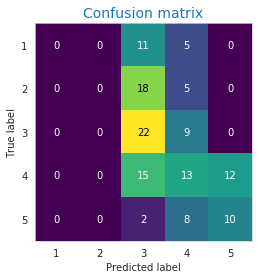

In [23]:
### choosing the best model, which is Decision tree to do some visualization for the results
pred = pred_values_5['Decision Tree']
#Confusion matrix 
scores_image = mglearn.tools.heatmap(confusion_matrix(y_holdouttest_5cats, pred), xlabel='Predicted label',
                                     ylabel='True label', xticklabels=[1,2,3,4,5],
                                     yticklabels=[1,2,3,4,5], cmap="viridis", fmt="%d")
plt.title("Confusion matrix", c='C0', fontsize = 14)
plt.gca().invert_yaxis()


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_holdouttest_5cats, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        23
           3       0.32      0.71      0.44        31
           4       0.33      0.33      0.33        40
           5       0.45      0.50      0.48        20

    accuracy                           0.35       130
   macro avg       0.22      0.31      0.25       130
weighted avg       0.25      0.35      0.28       130



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



### <span style = "color: grey" >Feature importances

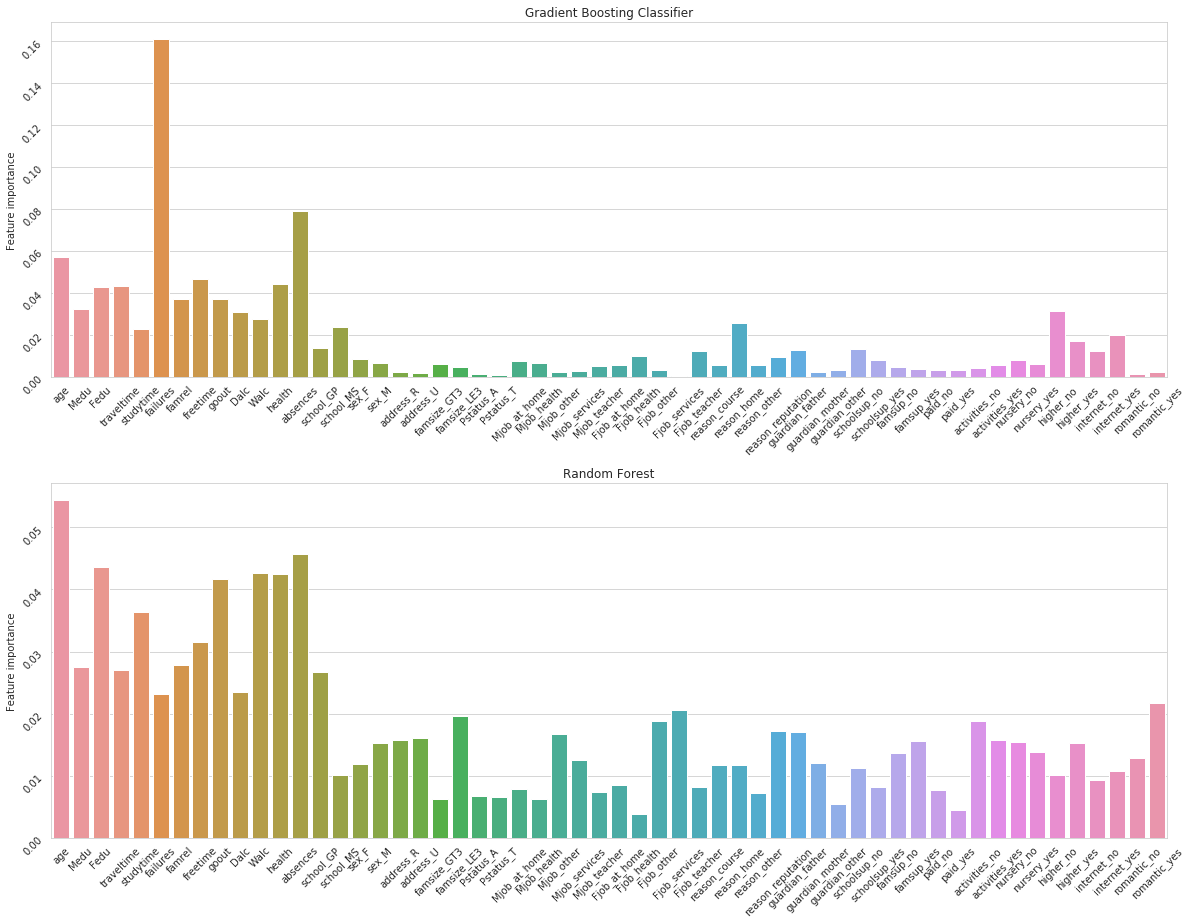

In [24]:
import seaborn as sns
fig, axes = plt.subplots(len(model_list_5), 1, figsize=(20, 15))
fig.subplots_adjust(hspace=0.3)
sns.set_style("whitegrid")
for (model, coef), ax in zip(model_list_5.items(),axes):    
    plot_feature_importances(model, coef, X_trainval.columns,ax = ax)

## <span style = "color: green" >GridSearch For Regression

In [0]:

bestgridsearch, gridsearchresult, summary_table, model_list, pred_values = model_tuning(regressor_model_hyperparameter, 
                                                         X_trainval, y_trainval_reg, X_holdouttest, y_holdouttest_reg,
                                                         cv = 5, 
                                                         scoring = {'R2': 'r2', 'RMSE': make_scorer(RMSE, greater_is_better=False)}, 
                                                         refit = 'RMSE',
                                                         scoring_name = 'RMSE')

### some midification to the output as gridsearch return negative MSE, toget the RMSE
summary_table['Train RMSE'] = summary_table['Train RMSE'].transform(lambda x: -x)
summary_table['Test RMSE'] = summary_table['Test RMSE'].transform(lambda x: -x)
summary_table


==================== Train and evaluate on K-Nearest Neighbors ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Ridge Regression ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Lasso Regression ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Linear SVR ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Gradient Boosting Regressor ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Decision Tree ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on Random Forest ====================


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



==================== Train and evaluate on MLP ====================


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iteration

,Model,Best Parameters,Train RMSE,Test RMSE
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 5}",2.568506,2.960873
0,Ridge Regression,{'alpha': 100},2.671775,2.605748
0,Lasso Regression,{'alpha': 0.01},2.617140,2.584276
0,Linear SVR,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",2.646267,2.561013
0,Gradient Boosting Regressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",2.379186,2.513889
0,Decision Tree,"{'max_depth': 3, 'random_state': 711}",2.705244,2.636452
0,Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",1.393374,2.515835
0,MLP,"{'alpha': 0.3, 'hidden_layer_sizes': [10, 20],...",2.653175,2.574814


In [0]:
cprint('Results on data without G1 and G2 - MUTICLASSIFICATION TASK', color='blue')
summary_table

Results on data without G1 and G2 - MUTICLASSIFICATION TASK


,Model,Best Parameters,Train RMSE,Test RMSE
0,K-Nearest Neighbors,"{'leaf_size': 4, 'n_neighbors': 5}",2.568506,2.960873
0,Ridge Regression,{'alpha': 100},2.671775,2.605748
0,Lasso Regression,{'alpha': 0.01},2.617140,2.584276
0,Linear SVR,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",2.646267,2.561013
0,Gradient Boosting Regressor,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",2.379186,2.513889
0,Decision Tree,"{'max_depth': 3, 'random_state': 711}",2.705244,2.636452
0,Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",1.393374,2.515835
0,MLP,"{'alpha': 0.3, 'hidden_layer_sizes': [10, 20],...",2.653175,2.574814


In [0]:
### VISUALIZATION THE GRIDSEARCH
results = gridsearchresult['Random Forest']
results = pd.DataFrame.from_dict(results)
for col in results:
    if 'RMSE' in col:
        results[col] = results[col].transform(lambda x: (-x))

scoring = {'R2': 'r2', 'RMSE': make_scorer(RMSE, greater_is_better=False)}
lims = {'R2': [(0,200), (0.75, 1)] , 'RMSE':  [(0,220), (0.25, 1.5)]}
param_of_interest = ['n_estimators', 'max_depth']

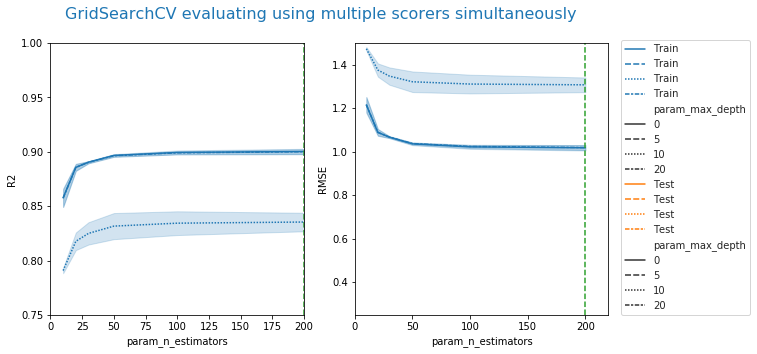

In [0]:
plot_GridSearchResult(results, scoring, param_of_interest, lims, figsize = (10,5))